Dataset is from a streaming service. Variables:

`show_id` - unique id of the show/movie

`title` - title of the show

`description` - brief overview of the show

`director` - director(s) of the show

`genres` - genre(s) of the show

`cast` - actor(s) in the show

`production_country` - where the show was produced

`release_date` - public release date of the show - show can be released earlier (on other services) and then be added to this platform later

`rating` - age rating of the show

`duration` - lenght of the movie - in minutes, lengh of the series - number of series

`imdb_score` - score the show received by imdb webpage

`content_type` - Movie / TV Show

`date_added` - when was the show added to the streaming platform

In [ ]:
from datetime import datetime,date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
url = "/work/data/homework 11/streamingServiceData.csv"
df = pd.read_csv(url)
df.isna().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

# CLEANING DATA

Clean column names, deal with nulls, sort out column types, have a look at data inside columns and clean it (if applicable). For example `title` has a lot of titles starting with #, clean that. Is there anything else elsewhere that needs to be cleaned?

imdb score column. Clean that so it can be used in analysis.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
url = "/work/data/homework 11/streamingServiceData.csv"

class Streaming():
    def __init__(self,url):

        self.load_df(url)
        self.clean_columns()

    def load_df(self, url):
        self.df= pd.read_csv(url)
    
    def nan_in_dataframe(self):    
        return self.df.isna().sum()
        #return self.df.info() 

    def clean_columns(self):
        self.df.columns = self.df.columns.str.lower()
        self.df.columns = self.df.columns.str.replace(" ","_")

        self.df.drop_duplicates(subset=["title"], keep='last', inplace=True)
        self.df.dropna(subset=["production_country","release_date", "rating", "duration", "imdb_score"], how="any", inplace=True)
        self.df["date_added"].fillna(self.df["release_date"], inplace=True)
        self.df["release_date"] = self.df["release_date"].astype(int)
        
        self.df["title"] = self.df["title"].str.lstrip("#")
        self.df["director"] = self.df["director"].fillna('N/A')
        self.df["cast"] = self.df["cast"].fillna('N/A')
        self.df["imdb_score"] = self.df["imdb_score"].str.replace("/10","").astype(float)
        self.df = self.df.apply(split_score, axis=1)    


        # self.df = self.df.apply(self.my_functions, axis=1)
        #self.df["imdb_score"] = self.df["imdb_score"].apply(self.my_functions)

    def my_functions(self,row):
        split_score = row["imdb_score"].split("/")
        row["idmb_score"] = float(split_score[0])
        row["idmb_score_max_score"] = float(split_score[1])
        return row

    def my_functions(self, x):
        return float(x.split("/")[0])

    def split_score(row):
        split_duration = row["duration"].split(" ")
        row["duration"] = int(split_duration[0])
        row["show_type"] = split_duration[1].lower()
        return row


    def box_plot(self):
        plt.figure(figsize=(20, 8))
        ax= sns.boxplot(data=self.df,
                  x="imdb_score",
                  y="content_type")

    def boxen_plot(self):
        plt.figure(figsize=(20, 8))
        ax= sns.boxenplot(data=self.df,
                  x="imdb_score",
                  y="content_type")

    def hist_plot_score(self):
        plt.figure(figsize=(20, 8))
        ax= sns.histplot(data=self.df,
                  x="imdb_score",
                  bins = 30)
    def hist_plot_score(self):
        plt.figure(figsize=(20, 8))
        ax= sns.histplot(data=self.df,
                  x="imdb_score",
                  bins = 30)

    def hist_plot_rating(self):
        plt.figure(figsize=(20, 8))
        ax= sns.histplot(data=self.df,
                  x="rating",
                  bins = 30)

    def count_plot_content_type(self):
        plt.figure(figsize=(20, 8))
        ax= sns.countplot(data=self.df,
                          x="content_type")
    
    def histplot_duration(self):
        fig = plt.figure(figsize=(25, 8))
        ax= sns.histplot(data=self.df,
                          x="duration")
                          #order = self.df["duration"].sort_values(ascending=False).index)                      
        plt.xticks(rotation=90, horizontalalignment="right")

    def countplot_relase_date(self, year_from=2010, year_to=2021):
        plt.figure(figsize=(20, 8))

        filtered_data = self.df[(self.df["release_date"] >= year_from) & (self.df["release_date"] <= year_to)]

        ax= sns.countplot(data=filtered_data,
                          x="release_date",
                          hue="content_type")

    def countplot_directors(self):
        plt.figure(figsize=(20, 8))
        ax= sns.countplot(data=self.df,
                          x="director",
                          order = self.df["director"].value_counts().sort_values(ascending=False).index)
    def crosstab(self):
        pd.crosstab(index=self.df['rating'], columns=[self.df['imdb_score']],
            margins=True).style.background_gradient(cmap='YlGn')                                              

test = Streaming(url)

# GRAPHS

If you cleaned `imdb_score` column properly, it should now be a column of just scores - without `/10` and cast as a numeric column.

Make a `sns.boxplot()` to see what is the score distribution ranges. What is a better way to represent the data `boxenplot` or `boxplot`?

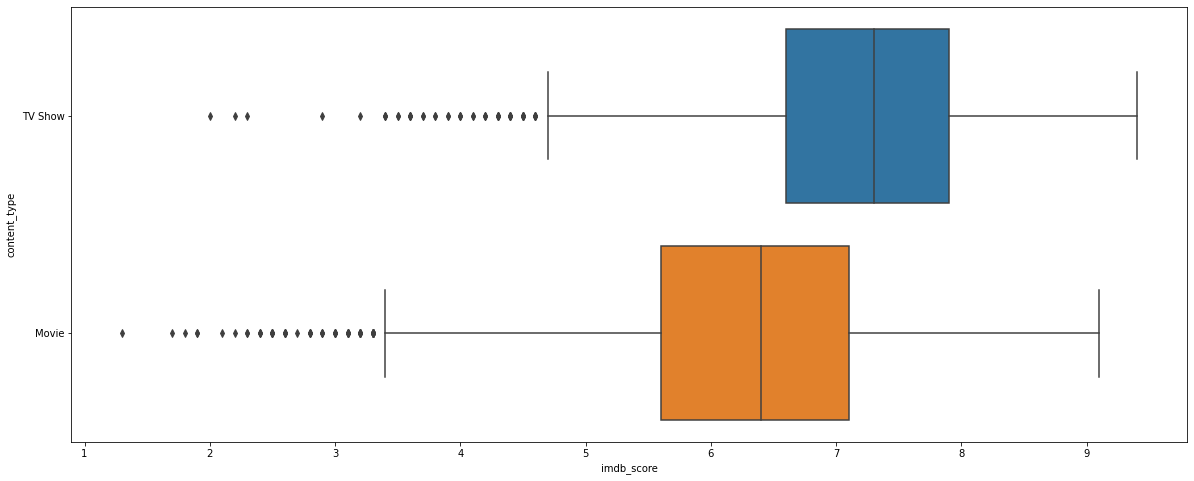

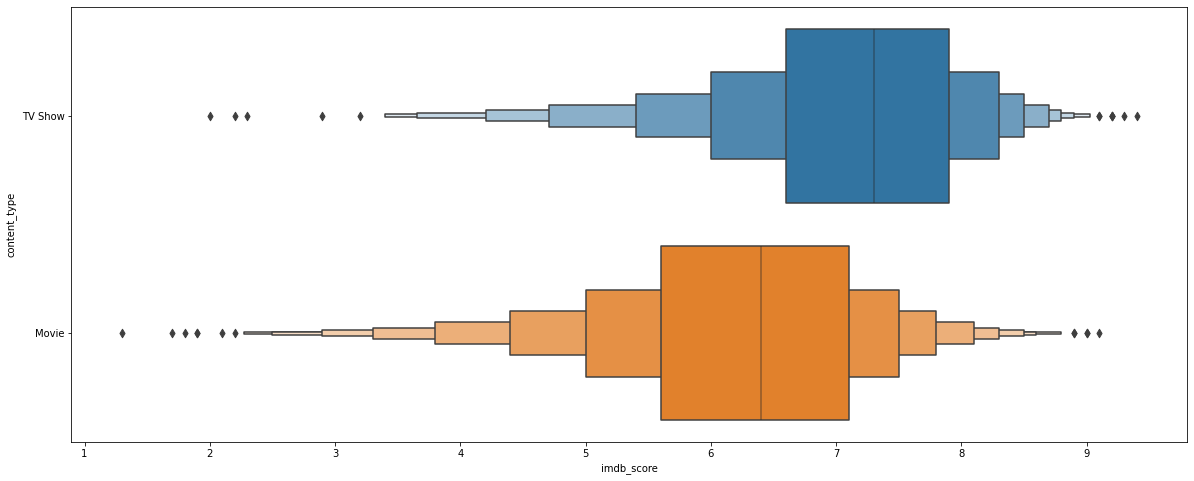

In [ ]:
test.box_plot()
test.boxen_plot()

Make `sns.histplot()` on the score, so you can see distribution of the ibmd score.

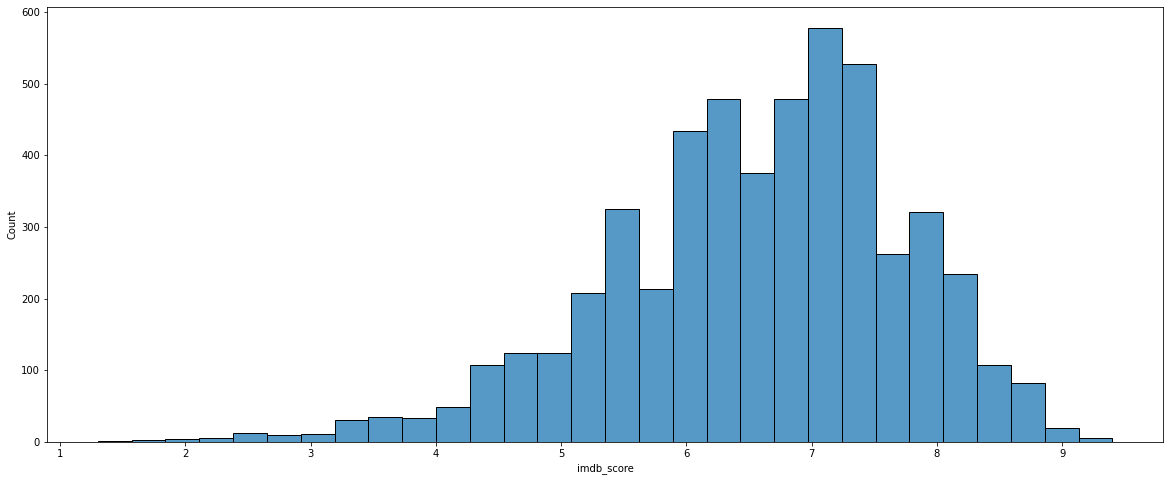

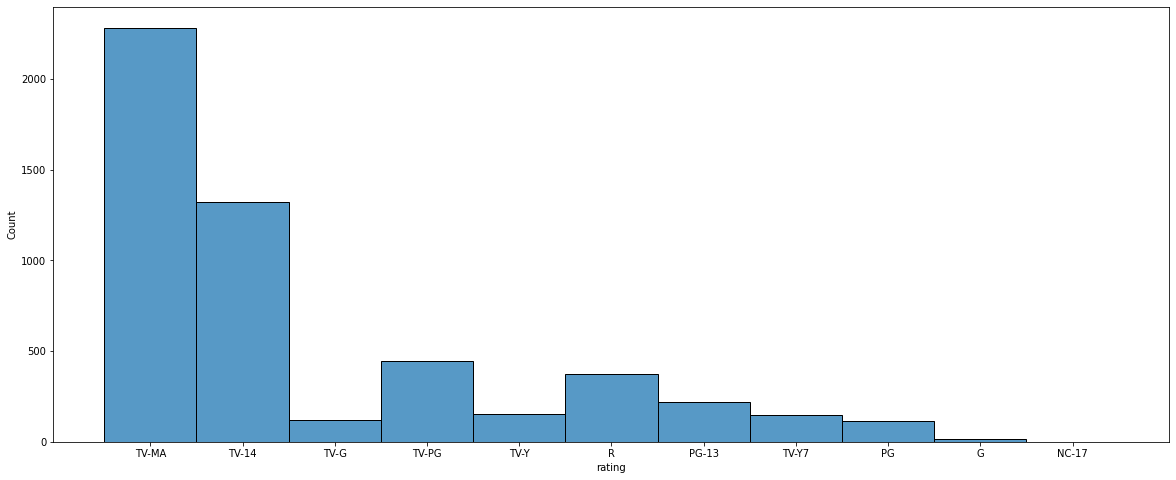

In [ ]:
test.hist_plot_score()
test.hist_plot_rating()

Make `sns.countplot()` on `content type`, `genre`,  `rating`

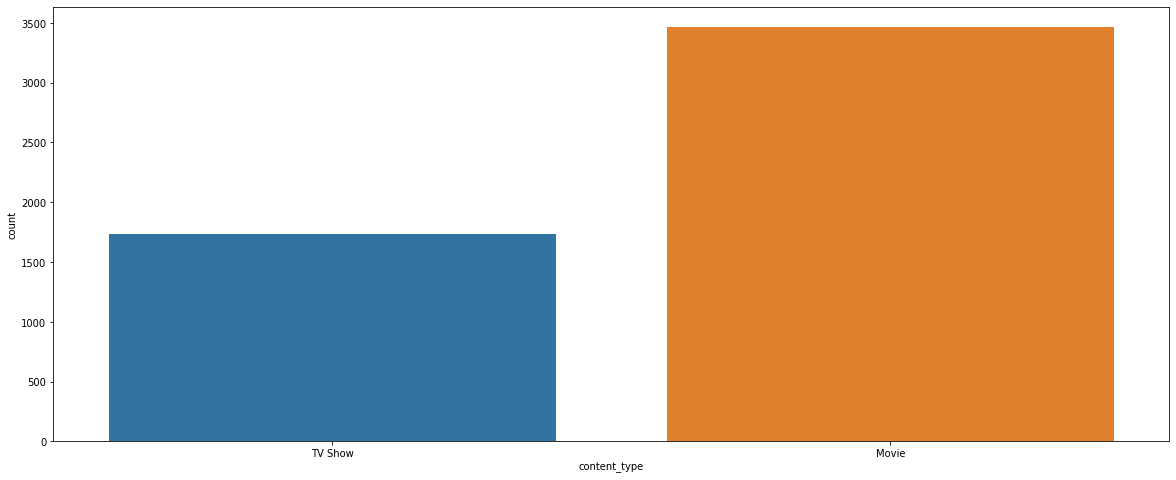

In [ ]:
test.count_plot_content_type()

In [ ]:

#
#test.countplot_relase_date()
#test.countplot_directors()
test.crosstab()

Make `sns.histplot()` on `duration` to see the lenghts of the movies/shows.

Use appropriate graph size, angle the axis if required. And most importantly, order the axis so thata the duration of the movies/tv series, is in ascending order.

(0.0, 200.0)

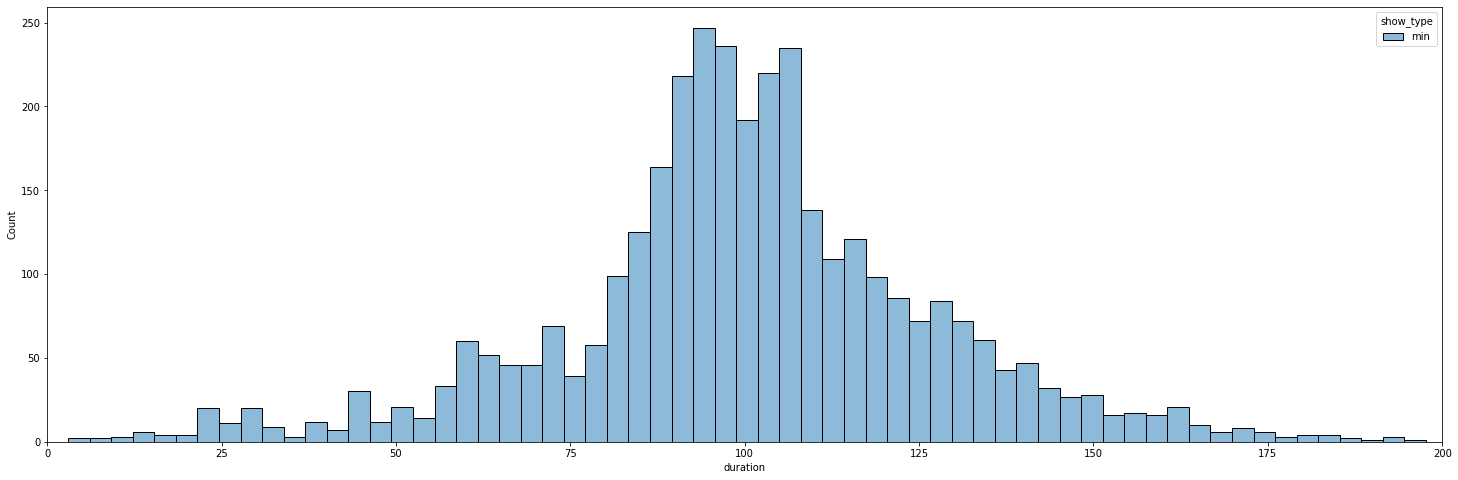

In [ ]:
fig = plt.figure(figsize=(25, 8))
ax= sns.histplot(data=test.df[test.df['show_type']=="min"],
                    x="duration",
                    hue="show_type",
                    bins=100)
                    #order = self.df["duration"].sort_values(ascending=False).index)                      
plt.xlim(0,200)

<AxesSubplot:xlabel='duration', ylabel='count'>

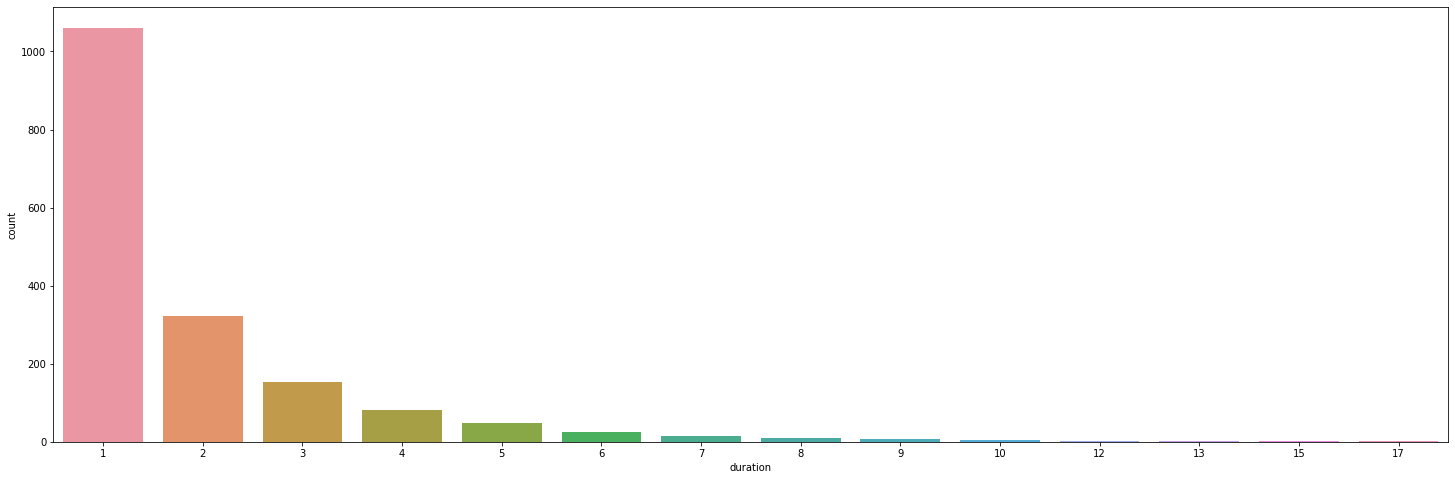

In [ ]:
fig = plt.figure(figsize=(25, 8))
sns.countplot(data=test.df[test.df["content_type"] == "TV Show"],
              x="duration")

In [ ]:
test.df[(test.df["content_type"] == "TV Show") & (test.df["duration"] > 8)].head()

,show_id,title,description,director,genres,cast,production_country,release_date,rating,duration,imdb_score,content_type,date_added,show_type
327,3241cc0d-b528-4ac2-b027-b22c0cdad02a,American Horror Story,This twisted Emmy-winning drama plays upon the...,N/A,"TV Horror, TV Mysteries, TV Thrillers","Evan Peters, Sarah Paulson, Jessica Lange, Den...",United States,2019.0,TV-MA,9,8.1,TV Show,"November 13, 2020",seasons
867,04d6f585-66ae-43f1-b788-e74385295d3a,Call the Midwife,This period drama set in impoverished East Lon...,Philippa Lowthorpe,"British TV Shows, International TV Shows, TV D...","Vanessa Redgrave, Bryony Hannah, Helen George,...",United Kingdom,2020.0,TV-MA,9,8.4,TV Show,"September 15, 2020",seasons
1076,76cf47f7-9f7e-4a14-8f5c-9bc30e0229b3,COMEDIANS of the world,This global stand-up comedy series features a ...,N/A,"Stand-Up Comedy & Talk Shows, TV Comedies","Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,2019.0,TV-MA,13,6.3,TV Show,"January 1, 2019",seasons
1134,a92319f0-4f90-4f4d-855b-3540660d6889,Criminal Minds,This intense police procedural follows a group...,N/A,"Crime TV Shows, TV Dramas, TV Mysteries","Mandy Patinkin, Joe Mantegna, Thomas Gibson, S...","United States, Canada",2017.0,TV-14,12,8.0,TV Show,"June 30, 2017",seasons
1182,01fd6d27-7826-4782-bddb-2ca0503d352a,Danger Mouse: Classic Collection,Follow the adventures of superspy Danger Mouse...,N/A,"British TV Shows, Kids' TV, TV Comedies","David Jason, Terry Scott, Edward Kelsey, Brian...",United Kingdom,1992.0,TV-Y,10,7.3,TV Show,"June 15, 2015",seasons


Make a `sns.countplot()` on `release data`. 

Graph is probably too cluttered, select a sensible year which you will set as a cut-off, and display data only after then. 

Add another parameter (hue), so that we can see the number of movies and tv shows released individually - `Content Type`.

If your x axis has decimal point `2021.0` fix the data column, so that it is only an integer.

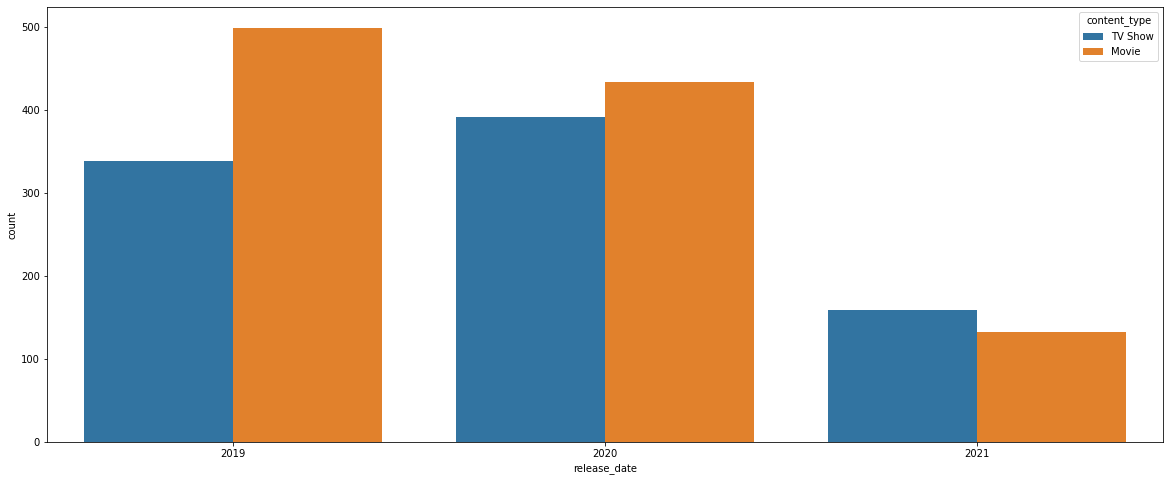

In [ ]:
test.countplot_relase_date(2016, 2018)

Make `sns.countplot()` and plot sensible number of directors with most movies.

order directors in descending order by the amount of movies they directed

In [ ]:
#test.countplot_directors() # do not run, too much

See the following plot. It shows number of `movies` by rating and `imdb_score`. But as you can see, the `imdb_score` has too many values. Make it such that the scores are rounded to the nearest integer, and the plot it again. This way there should be only 10 columns.

In [ ]:
test.crosstab()

In [ ]:
pd.crosstab(index=df['Rating'], columns=[df['Imdb Score']],
            margins=True).style.background_gradient(cmap='YlGn')

Imdb Score,1.3/10,1.7/10,1.8/10,1.9/10,2.0/10,2.1/10,2.2/10,2.3/10,2.4/10,2.5/10,2.6/10,2.7/10,2.8/10,2.9/10,3.0/10,3.1/10,3.2/10,3.3/10,3.4/10,3.5/10,3.6/10,3.7/10,3.8/10,3.9/10,4.0/10,4.1/10,4.2/10,4.3/10,4.4/10,4.5/10,4.6/10,4.7/10,4.8/10,4.9/10,5.0/10,5.1/10,5.2/10,5.3/10,5.4/10,5.5/10,5.6/10,5.7/10,5.8/10,5.9/10,6.0/10,6.1/10,6.2/10,6.3/10,6.4/10,6.5/10,6.6/10,6.7/10,6.8/10,6.9/10,7.0/10,7.1/10,7.2/10,7.3/10,7.4/10,7.5/10,7.6/10,7.7/10,7.8/10,7.9/10,8.0/10,8.1/10,8.2/10,8.3/10,8.4/10,8.5/10,8.6/10,8.7/10,8.8/10,8.9/10,9.0/10,9.1/10,9.2/10,9.3/10,9.4/10,All
Rating,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
NC-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
PG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,2,1,4,0,1,2,0,0,2,4,1,1,1,2,8,5,1,4,6,3,1,6,1,7,3,9,7,2,2,7,3,2,4,2,2,2,2,1,2,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,121
PG-13,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,1,0,2,0,1,0,1,2,2,2,2,3,4,7,10,6,7,4,5,14,10,5,3,6,10,15,9,8,7,7,10,10,8,2,5,7,5,4,5,2,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,224
R,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,2,2,2,1,1,1,1,3,4,1,2,1,1,3,5,2,3,1,2,6,4,6,10,13,8,13,14,10,6,18,15,10,21,12,15,15,7,17,7,8,20,13,9,12,5,8,3,5,6,5,2,3,3,1,2,1,0,0,0,0,0,0,0,0,375
TV-14,1,0,1,1,0,0,0,2,1,1,1,0,2,1,1,3,1,4,4,3,4,5,6,5,3,6,5,9,12,17,10,10,7,20,20,10,21,20,27,30,21,21,25,30,35,34,21,32,46,39,44,43,34,47,56,53,40,57,51,50,40,35,33,20,40,34,28,18,14,10,8,9,9,3,4,1,1,0,0,1360
TV-G,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,3,3,3,3,0,5,3,5,4,4,7,0,2,7,3,3,3,4,1,3,3,4,7,2,4,4,7,2,4,2,2,2,1,1,2,2,2,0,0,2,0,0,0,0,0,0,126
TV-MA,0,0,0,0,0,0,1,1,2,2,2,0,1,2,3,1,2,1,7,6,2,3,5,6,5,3,5,14,14,13,22,22,19,23,23,33,21,34,46,46,35,52,47,53,67,64,66,68,93,82,93,80,71,70,79,105,94,86,84,75,60,67,56,36,63,36,31,41,30,30,25,10,7,6,3,1,1,0,1,2358
TV-PG,0,1,0,0,1,1,1,0,0,2,0,0,1,0,0,0,1,2,0,1,0,1,2,0,1,1,3,1,5,4,2,3,5,6,2,5,3,7,4,10,8,2,12,13,9,9,10,17,13,22,21,18,9,19,14,19,17,22,19,17,15,11,11,5,10,9,7,2,7,3,4,2,2,0,0,0,1,0,0,455


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3ce7c8-a514-49e4-9ba4-a5899ac52ea5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>